In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot

In [126]:
n_points = 500
theta = 2.0*np.pi*np.random.random(n_points)
r = 8.0*np.sqrt(np.random.random(n_points))
x = r*np.cos(theta)
y = r*np.sin(theta)

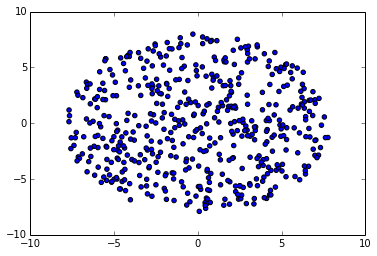

In [127]:
pyplot.scatter(x,y)

In [128]:
R1 = 3.0
R2 = 3.0

In [129]:
r = np.sqrt(x**2 + y**2)
cos_alpha = (R2*R2 + R1*R1 - r*r)/(2.0*R2*R1)
cos_beta = (R1*R1 + r*r - R2*R2)/(2.0*R1*r)
cos_gamma = (r*r + R2*R2 - R1*R1)/(2.0*r*R2)
cos_delta = x/r

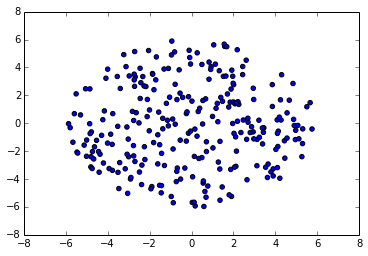

In [130]:
good = np.where(np.abs(cos_gamma)<=1.0)
pyplot.scatter(x[good],y[good])

In [131]:
P = cos_alpha.copy()
T = cos_alpha.copy()
P[:] = np.inf
T[:] = np.inf

T[good] = 2.0*np.pi - np.arccos(cos_beta[good]) - np.arccos(cos_delta[good])
P[good] = np.pi - np.arccos(cos_alpha[good])

positive_y = np.where((y>=0.0) & (np.abs(cos_gamma)<=1.0))
T[positive_y] = np.arccos(cos_delta[positive_y]) - np.arccos(cos_beta[positive_y])

P[good] = np.rad2deg(P[good])
T[good] = np.rad2deg(T[good])

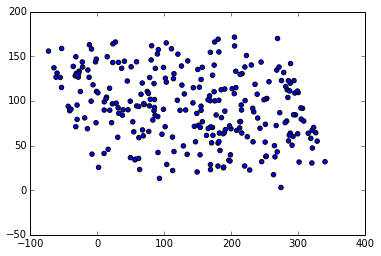

In [132]:
pyplot.scatter(T[good], P[good])

In [133]:
#check the conversion

n_points = np.size(P)
#P[:] = np.linspace(0.0,90.0,n_points)
#T[:] = 0

new_x = np.ones(n_points)
new_y = np.ones(n_points)

arm_1 = np.zeros((n_points,2))
arm_2 = np.zeros((n_points,2))
arm_1[:,0] = R1
arm_2[:,0] = R2
arm_2[:,1] = 0.0
arm_1[:,1] = 0.0
n_arm_2 = arm_2.copy()
n_arm_1 = arm_1.copy()

#first rotate around phi
n_arm_2[good,0] = arm_2[good,0]*np.cos(np.deg2rad(P[good])) - arm_2[good,1]*np.sin(np.deg2rad(P[good]))
n_arm_2[good,1] = arm_2[good,0]*np.sin(np.deg2rad(P[good])) + arm_2[good,1]*np.cos(np.deg2rad(P[good]))

#offset the central axis
#n_arm_2[:,0] = n_arm_2[:,0] + R1*np.cos(np.deg2rad(T[good]))
#n_arm_2[:,1] = n_arm_2[:,1] + R1*np.sin(np.deg2rad(T[good]))

#now rotate everything about theta
arm_2[good,0] = n_arm_2[good,0]*np.cos(np.deg2rad(T[good])) - n_arm_2[good,1]*np.sin(np.deg2rad(T[good]))
arm_2[good,1] = n_arm_2[good,0]*np.sin(np.deg2rad(T[good])) + n_arm_2[good,1]*np.cos(np.deg2rad(T[good]))
arm_1[good,0] = n_arm_1[good,0]*np.cos(np.deg2rad(T[good])) - n_arm_1[good,1]*np.sin(np.deg2rad(T[good]))
arm_1[good,1] = n_arm_1[good,0]*np.sin(np.deg2rad(T[good])) + n_arm_1[good,1]*np.cos(np.deg2rad(T[good]))

new_x[good] = arm_1[good,0] + arm_2[good,0] 
new_y[good] = arm_1[good,1] + arm_2[good,1]

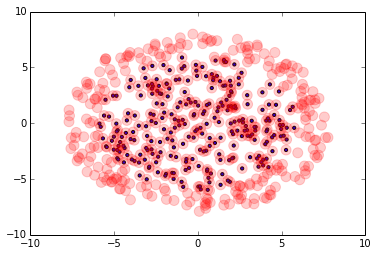

In [134]:
pyplot.scatter(new_x[good], new_y[good], s=10.0)
pyplot.scatter(x, y, color='red', alpha=0.2, s=100.0)

In [135]:
error = np.sqrt((new_x[good]-x[good])**2 + (new_y[good]-y[good])**2)+1E-16

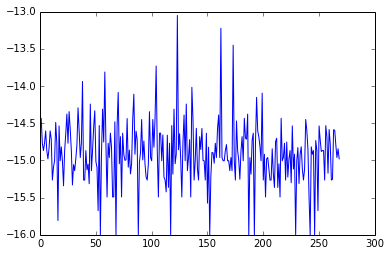

In [136]:
pyplot.plot(np.log10(error))